<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Regression Models with Keras</font></h1>

## Introduction

As we discussed in the videos, despite the popularity of more powerful libraries such as PyToch and TensorFlow, they are not easy to use and have a steep learning curve. So, for people who are just starting to learn deep learning, there is no better library to use other than the Keras library. 

Keras is a high-level API for building deep learning models. It has gained favor for its ease of use and syntactic simplicity facilitating fast development. As you will see in this lab and the other labs in this course, building a very complex deep learning network can be achieved with Keras with only few lines of code. You will appreciate Keras even more, once you learn how to build deep models using PyTorch and TensorFlow in the other courses.

So, in this lab, you will learn how to use the Keras library to build a regression model.

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Download and Clean Dataset</a>  
2. <a href="#item32">Import Keras</a>  
3. <a href="#item33">Build a Neural Network</a>  
4. <a href="#item34">Train and Test the Network</a>  

</font>
</div>

<a id="item31"></a>

## Download and Clean Dataset

Let's start by importing the <em>pandas</em> and the Numpy libraries.

In [129]:
import pandas as pd
import numpy as np

We will be playing around with the same dataset that we used in the videos.

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>

Let's download the data and read it into a <em>pandas</em> dataframe.

In [130]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa. 

#### Let's check how many data points we have.

In [131]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.

Let's check the dataset for any missing values.

In [132]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [133]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.

#### Split data into predictors and target

The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.

In [134]:
concrete_data_columns = concrete_data.columns

predictors= concrete_data.iloc[:,:7] # select first 6 features
target = concrete_data.iloc[:,-1] # select last feature as y

<a id="item2"></a>

Let's do a quick sanity check of the predictors and the target dataframes.

In [135]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5


In [136]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

let us first evaluate the model without scaling it


In [137]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test,y_train,y_test = train_test_split(predictors,target, test_size = 0.3,random_state = 42)

In [140]:
y_train

196    25.72
631    17.54
81     25.20
526    23.64
830    33.76
       ...  
87     24.40
330    42.22
466    33.56
121    68.30
860    38.46
Name: Strength, Length: 721, dtype: float64

In [141]:
def keras_model():
    model = Sequential()
    model.add(Dense(10,input_shape = (predictors.shape[1],),activation = "relu"))
    model.add(Dense(1)) #no activation function here as you need the raw form, not transformed form
    model.compile(optimizer = "adam",loss="mean_squared_error",metrics = ["mae","mape"])
    return model

In [142]:
model_noscale = keras_model()
history = model_noscale.fit(X_train,y_train,epochs = 50,validation_data = (X_test,y_test))

Train on 721 samples, validate on 309 samples
Epoch 1/50
721/721 [==============================] - 10s 14ms/step - loss: 57585.5646 - mean_absolute_error: 222.6673 - mean_absolute_percentage_error: 942.1096 - val_loss: 32552.6774 - val_mean_absolute_error: 166.6505 - val_mean_absolute_percentage_error: 751.4241
Epoch 2/50
721/721 [==============================] - 0s 300us/step - loss: 19359.4314 - mean_absolute_error: 120.7260 - mean_absolute_percentage_error: 537.8010 - val_loss: 10345.2984 - val_mean_absolute_error: 85.5253 - val_mean_absolute_percentage_error: 419.6208
Epoch 3/50
721/721 [==============================] - 0s 346us/step - loss: 7216.9536 - mean_absolute_error: 67.3536 - mean_absolute_percentage_error: 311.5678 - val_loss: 4639.8988 - val_mean_absolute_error: 52.7188 - val_mean_absolute_percentage_error: 259.6325
Epoch 4/50
721/721 [==============================] - 0s 355us/step - loss: 4619.6807 - mean_absolute_error: 51.0378 - mean_absolute_percentage_error: 223.

Epoch 32/50
721/721 [==============================] - 0s 288us/step - loss: 1437.9432 - mean_absolute_error: 29.0077 - mean_absolute_percentage_error: 124.9121 - val_loss: 1279.6057 - val_mean_absolute_error: 27.9023 - val_mean_absolute_percentage_error: 127.1674
Epoch 33/50
721/721 [==============================] - 0s 314us/step - loss: 1379.6876 - mean_absolute_error: 28.4418 - mean_absolute_percentage_error: 119.8466 - val_loss: 1234.5192 - val_mean_absolute_error: 27.4514 - val_mean_absolute_percentage_error: 124.8121
Epoch 34/50
721/721 [==============================] - 0s 296us/step - loss: 1326.7108 - mean_absolute_error: 27.9463 - mean_absolute_percentage_error: 119.5432 - val_loss: 1197.0778 - val_mean_absolute_error: 27.0837 - val_mean_absolute_percentage_error: 124.1891
Epoch 35/50
721/721 [==============================] - 0s 317us/step - loss: 1275.0060 - mean_absolute_error: 27.4494 - mean_absolute_percentage_error: 117.3113 - val_loss: 1153.9941 - val_mean_absolute_er

In [17]:
model_noscale.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

dict_keys(['val_loss', 'val_mean_absolute_error', 'val_mean_absolute_percentage_error', 'loss', 'mean_absolute_error', 'mean_absolute_percentage_error'])


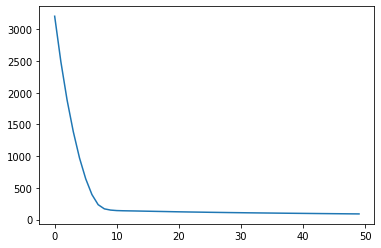

In [57]:
print(history.history.keys())
plt.plot(history.history["val_mean_absolute_percentage_error"])
plt.title("Validation MAPE over 50 Epochs")

In [61]:
model_noscale.evaluate(X_test,y_test)

309/309 [==============================] - 0s 66us/step


[827.1247031202594, 23.315153177502086, 89.792213464632]

Loop the model 50 times

In [173]:
def keras_model():
    model = Sequential()
    model.add(Dense(10,input_shape = (predictors.shape[1],),activation = "relu"))
    model.add(Dense(1)) #no activation function here as you need the raw form, not transformed form
    model.compile(optimizer = "adam",loss="mean_squared_error",metrics = ["mae","mape"])
    return model

In [ ]:
results = []
history_store = []
for i in range(0,50):
    X_train, X_test,y_train,y_test = train_test_split(predictors,target, test_size = 0.3,random_state = 42)
    model_noscale = keras_model()
    history = model_noscale.fit(X_train,y_train,epochs = 50,validation_split=0.2)
    history_store.append((i,history))
    results.append(model_noscale.evaluate(X_test,y_test)[0:3])

Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 9s 16ms/step - loss: 386386.2292 - mean_absolute_error: 617.5537 - mean_absolute_percentage_error: 2431.9177 - val_loss: 286881.3491 - val_mean_absolute_error: 533.3608 - val_mean_absolute_percentage_error: 1880.9120
Epoch 2/50
576/576 [==============================] - 0s 265us/step - loss: 226731.3915 - mean_absolute_error: 472.0553 - mean_absolute_percentage_error: 1874.1569 - val_loss: 161956.2325 - val_mean_absolute_error: 399.8995 - val_mean_absolute_percentage_error: 1418.2090
Epoch 3/50
576/576 [==============================] - 0s 261us/step - loss: 128015.8624 - mean_absolute_error: 353.5495 - mean_absolute_percentage_error: 1406.8816 - val_loss: 89174.0585 - val_mean_absolute_error: 295.6994 - val_mean_absolute_percentage_error: 1057.2328
Epoch 4/50
576/576 [==============================] - 0s 275us/step - loss: 71704.5911 - mean_absolute_error: 263.3292 - mean_absolute_perce

In [78]:
mae = list(map(lambda x: x[1],results))
mape = list(map(lambda x: x[2],results))

Text(0.5, 1.0, 'Step A (MAE) from 50 loops')

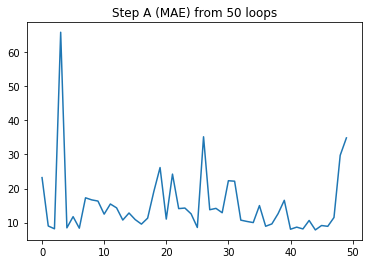

In [79]:
plt.plot(mae)
plt.title("Step A (MAE) from 50 loops")

Text(0.5, 1.0, 'Step A (MAPE) from 50 loops')

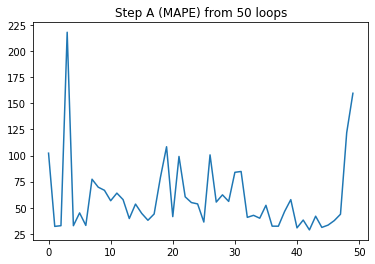

In [80]:
plt.plot(mape)
plt.title("Step A (MAPE) from 50 loops")

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.

In [81]:
print("Step A: mean is {} and s.d is {}".format(np.mean(mae),np.std(mae)))

Step A: mean is 15.29181210419121 and s.d is 9.77995952809339


# Step B

Scale the data now

In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [144]:
concrete_data_scale = sc.fit_transform(concrete_data)

In [145]:
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Work with the scaled data set

In [147]:
x_scale = list(map(lambda x: x[:7],concrete_data_scale))

In [148]:
y_scale = list(map(lambda x: x[-1],concrete_data_scale))

In [170]:
X_train, X_test,y_train,y_test  = train_test_split(np.asarray(x_scale),np.asarray(y_scale),test_size = 0.3,random_state = 42)  

In [171]:
def keras_model():
    model = Sequential()
    model.add(Dense(10,input_shape = (predictors.shape[1],),activation = "relu"))
    model.add(Dense(1)) #no activation function here as you need the raw form, not transformed form
    model.compile(optimizer = "adam",loss="mean_squared_error",metrics = ["mae","mape"])
    return model

In [172]:
results_scale = []
history_store_scale = []
for i in range(0,50):
    #train test split with the scaled dataset
    X_train, X_test,y_train,y_test  = train_test_split(np.asarray(x_scale),np.asarray(y_scale),\
                                                       test_size = 0.3,random_state = 42)                                                                                
    model_scale = keras_model()
    history = model_scale.fit(X_train,y_train,epochs = 50,validation_split=0.2)
    history_store_scale.append((i,history))
    results_scale.append(model_scale.evaluate(X_test,y_test)[0:3])

Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 11s 19ms/step - loss: 1.3590 - mean_absolute_error: 0.9549 - mean_absolute_percentage_error: 194.1499 - val_loss: 1.0605 - val_mean_absolute_error: 0.8697 - val_mean_absolute_percentage_error: 343.4048
Epoch 2/50
576/576 [==============================] - 0s 371us/step - loss: 1.2024 - mean_absolute_error: 0.8954 - mean_absolute_percentage_error: 165.7427 - val_loss: 0.9658 - val_mean_absolute_error: 0.8325 - val_mean_absolute_percentage_error: 315.7277
Epoch 3/50
576/576 [==============================] - 0s 386us/step - loss: 1.0774 - mean_absolute_error: 0.8508 - mean_absolute_percentage_error: 170.4860 - val_loss: 0.8884 - val_mean_absolute_error: 0.7974 - val_mean_absolute_percentage_error: 289.9601
Epoch 4/50
576/576 [==============================] - 0s 381us/step - loss: 0.9845 - mean_absolute_error: 0.8112 - mean_absolute_percentage_error: 171.4189 - val_loss: 0.8265 - val_mean_

Epoch 33/50
576/576 [==============================] - 0s 274us/step - loss: 0.5242 - mean_absolute_error: 0.5882 - mean_absolute_percentage_error: 203.0873 - val_loss: 0.6139 - val_mean_absolute_error: 0.6367 - val_mean_absolute_percentage_error: 310.7412
Epoch 34/50
576/576 [==============================] - 0s 297us/step - loss: 0.5209 - mean_absolute_error: 0.5865 - mean_absolute_percentage_error: 201.7284 - val_loss: 0.6141 - val_mean_absolute_error: 0.6367 - val_mean_absolute_percentage_error: 310.3816
Epoch 35/50
576/576 [==============================] - 0s 343us/step - loss: 0.5182 - mean_absolute_error: 0.5844 - mean_absolute_percentage_error: 200.7409 - val_loss: 0.6134 - val_mean_absolute_error: 0.6357 - val_mean_absolute_percentage_error: 311.2582
Epoch 36/50
576/576 [==============================] - 0s 234us/step - loss: 0.5158 - mean_absolute_error: 0.5832 - mean_absolute_percentage_error: 199.8334 - val_loss: 0.6106 - val_mean_absolute_error: 0.6356 - val_mean_absolute

576/576 [==============================] - 0s 270us/step - loss: 0.6335 - mean_absolute_error: 0.6425 - mean_absolute_percentage_error: 216.2319 - val_loss: 0.6353 - val_mean_absolute_error: 0.6883 - val_mean_absolute_percentage_error: 391.8216
Epoch 15/50
576/576 [==============================] - 0s 351us/step - loss: 0.6206 - mean_absolute_error: 0.6370 - mean_absolute_percentage_error: 213.7206 - val_loss: 0.6304 - val_mean_absolute_error: 0.6850 - val_mean_absolute_percentage_error: 389.7262
Epoch 16/50
576/576 [==============================] - 0s 291us/step - loss: 0.6093 - mean_absolute_error: 0.6321 - mean_absolute_percentage_error: 214.2623 - val_loss: 0.6260 - val_mean_absolute_error: 0.6813 - val_mean_absolute_percentage_error: 392.4864
Epoch 17/50
576/576 [==============================] - 0s 310us/step - loss: 0.6008 - mean_absolute_error: 0.6288 - mean_absolute_percentage_error: 213.9082 - val_loss: 0.6240 - val_mean_absolute_error: 0.6786 - val_mean_absolute_percentage_

Epoch 46/50
576/576 [==============================] - 0s 235us/step - loss: 0.5245 - mean_absolute_error: 0.5861 - mean_absolute_percentage_error: 215.3652 - val_loss: 0.5964 - val_mean_absolute_error: 0.6402 - val_mean_absolute_percentage_error: 377.4560
Epoch 47/50
576/576 [==============================] - 0s 263us/step - loss: 0.5238 - mean_absolute_error: 0.5858 - mean_absolute_percentage_error: 215.8232 - val_loss: 0.5964 - val_mean_absolute_error: 0.6393 - val_mean_absolute_percentage_error: 378.7016
Epoch 48/50
576/576 [==============================] - 0s 279us/step - loss: 0.5222 - mean_absolute_error: 0.5848 - mean_absolute_percentage_error: 215.4500 - val_loss: 0.5958 - val_mean_absolute_error: 0.6390 - val_mean_absolute_percentage_error: 378.4804
Epoch 49/50
576/576 [==============================] - 0s 272us/step - loss: 0.5215 - mean_absolute_error: 0.5843 - mean_absolute_percentage_error: 215.9934 - val_loss: 0.5952 - val_mean_absolute_error: 0.6390 - val_mean_absolute

576/576 [==============================] - 0s 244us/step - loss: 0.4757 - mean_absolute_error: 0.5642 - mean_absolute_percentage_error: 237.4703 - val_loss: 0.5707 - val_mean_absolute_error: 0.6104 - val_mean_absolute_percentage_error: 343.1484
Epoch 28/50
576/576 [==============================] - 0s 282us/step - loss: 0.4739 - mean_absolute_error: 0.5633 - mean_absolute_percentage_error: 236.1968 - val_loss: 0.5701 - val_mean_absolute_error: 0.6094 - val_mean_absolute_percentage_error: 337.9843
Epoch 29/50
576/576 [==============================] - 0s 268us/step - loss: 0.4719 - mean_absolute_error: 0.5618 - mean_absolute_percentage_error: 236.7634 - val_loss: 0.5698 - val_mean_absolute_error: 0.6080 - val_mean_absolute_percentage_error: 341.7691
Epoch 30/50
576/576 [==============================] - 0s 271us/step - loss: 0.4698 - mean_absolute_error: 0.5611 - mean_absolute_percentage_error: 238.0208 - val_loss: 0.5694 - val_mean_absolute_error: 0.6083 - val_mean_absolute_percentage_

576/576 [==============================] - 0s 279us/step - loss: 0.9485 - mean_absolute_error: 0.7913 - mean_absolute_percentage_error: 338.9672 - val_loss: 0.8945 - val_mean_absolute_error: 0.7869 - val_mean_absolute_percentage_error: 269.7697
Epoch 9/50
576/576 [==============================] - 0s 228us/step - loss: 0.8906 - mean_absolute_error: 0.7649 - mean_absolute_percentage_error: 321.5245 - val_loss: 0.8363 - val_mean_absolute_error: 0.7615 - val_mean_absolute_percentage_error: 268.4733
Epoch 10/50
576/576 [==============================] - 0s 294us/step - loss: 0.8395 - mean_absolute_error: 0.7421 - mean_absolute_percentage_error: 312.3578 - val_loss: 0.7920 - val_mean_absolute_error: 0.7433 - val_mean_absolute_percentage_error: 282.8232
Epoch 11/50
576/576 [==============================] - 0s 302us/step - loss: 0.7986 - mean_absolute_error: 0.7223 - mean_absolute_percentage_error: 308.1165 - val_loss: 0.7570 - val_mean_absolute_error: 0.7276 - val_mean_absolute_percentage_e

Epoch 40/50
576/576 [==============================] - 0s 305us/step - loss: 0.5218 - mean_absolute_error: 0.5860 - mean_absolute_percentage_error: 231.7818 - val_loss: 0.5946 - val_mean_absolute_error: 0.6435 - val_mean_absolute_percentage_error: 350.2961
Epoch 41/50
576/576 [==============================] - 0s 241us/step - loss: 0.5189 - mean_absolute_error: 0.5847 - mean_absolute_percentage_error: 231.4910 - val_loss: 0.5944 - val_mean_absolute_error: 0.6430 - val_mean_absolute_percentage_error: 351.4551
Epoch 42/50
576/576 [==============================] - 0s 290us/step - loss: 0.5160 - mean_absolute_error: 0.5828 - mean_absolute_percentage_error: 229.5590 - val_loss: 0.5924 - val_mean_absolute_error: 0.6414 - val_mean_absolute_percentage_error: 349.9380
Epoch 43/50
576/576 [==============================] - ETA: 0s - loss: 0.5267 - mean_absolute_error: 0.5879 - mean_absolute_percentage_error: 169.95 - 0s 310us/step - loss: 0.5133 - mean_absolute_error: 0.5814 - mean_absolute_per

576/576 [==============================] - 0s 311us/step - loss: 0.6432 - mean_absolute_error: 0.6542 - mean_absolute_percentage_error: 171.2816 - val_loss: 0.6215 - val_mean_absolute_error: 0.6590 - val_mean_absolute_percentage_error: 252.7125
Epoch 22/50
576/576 [==============================] - 0s 306us/step - loss: 0.6286 - mean_absolute_error: 0.6459 - mean_absolute_percentage_error: 174.5775 - val_loss: 0.6138 - val_mean_absolute_error: 0.6536 - val_mean_absolute_percentage_error: 255.3631
Epoch 23/50
576/576 [==============================] - 0s 237us/step - loss: 0.6182 - mean_absolute_error: 0.6402 - mean_absolute_percentage_error: 180.1916 - val_loss: 0.6071 - val_mean_absolute_error: 0.6482 - val_mean_absolute_percentage_error: 267.5708
Epoch 24/50
576/576 [==============================] - 0s 294us/step - loss: 0.6093 - mean_absolute_error: 0.6350 - mean_absolute_percentage_error: 188.2567 - val_loss: 0.6004 - val_mean_absolute_error: 0.6429 - val_mean_absolute_percentage_

KeyboardInterrupt: 

In [ ]:
mae_scale = list(map(lambda x: x[1],results_scale))
mape_scale = list(map(lambda x: x[2],results_scale))

Text(0.5, 1.0, 'Step B MAE')

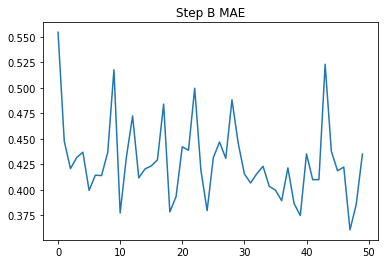

In [44]:
plt.plot(results_scale)
plt.title("Step B MAE")

Step B has a lower MAE - scaling data improves error

In [45]:
print("Step B: mean is {} and s.d is {}".format(np.mean(results_scale),np.std(results_scale)))



Step B: mean is 0.4278666310113611 and s.d is 0.03860573548951449


[Text(0, 0, 'Step A (no scale)'), Text(0, 0, 'Step B (scale)')]

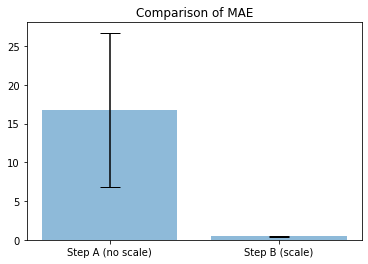

In [46]:
x_pos=np.arange(2)
CTEs = [np.mean(results),np.mean(results_scale)]
error = [np.std(results),np.std(results_scale)]
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
plt.title("Comparison of MAE")
ax.set_xticks(x_pos)
labels = ["Step A (no scale)","Step B (scale)"]
ax.set_xticklabels(labels)

# Step C

We run the model with 100 epochs now

In [47]:
results_scale_100 = []
history_store_scale = []
for i in range(0,50):
    #train test split with the scaled dataset
    X_train, X_test,y_train,y_test = X_train, X_test,y_train,y_test = train_test_split(x_scale,y_scale,\
                                                                                       test_size = 0.3,random_state = 42)
    model_scale = keras_model()
    history = model_scale.fit(X_train_scale,y_train,epochs = 100,validation_split=0.2)
    history_store_scale.append((i,history))
    results_scale_100.append(model_scale.evaluate(X_test_scale,y_test)[1])

Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 3s 5ms/step - loss: 1.6778 - mean_absolute_error: 1.0413 - val_loss: 1.1163 - val_mean_absolute_error: 0.8453
Epoch 2/100
576/576 [==============================] - 0s 78us/step - loss: 1.4882 - mean_absolute_error: 0.9798 - val_loss: 1.0067 - val_mean_absolute_error: 0.8049
Epoch 3/100
576/576 [==============================] - 0s 83us/step - loss: 1.3331 - mean_absolute_error: 0.9288 - val_loss: 0.9196 - val_mean_absolute_error: 0.7703
Epoch 4/100
576/576 [==============================] - 0s 74us/step - loss: 1.2053 - mean_absolute_error: 0.8855 - val_loss: 0.8498 - val_mean_absolute_error: 0.7402
Epoch 5/100
576/576 [==============================] - 0s 90us/step - loss: 1.0945 - mean_absolute_error: 0.8455 - val_loss: 0.7916 - val_mean_absolute_error: 0.7138
Epoch 6/100
576/576 [==============================] - 0s 87us/step - loss: 1.0049 - mean_absolute_error: 0.8117 - val_loss: 

Epoch 50/100
576/576 [==============================] - 0s 92us/step - loss: 0.2044 - mean_absolute_error: 0.3385 - val_loss: 0.2130 - val_mean_absolute_error: 0.3662
Epoch 51/100
576/576 [==============================] - 0s 87us/step - loss: 0.2025 - mean_absolute_error: 0.3366 - val_loss: 0.2095 - val_mean_absolute_error: 0.3634
Epoch 52/100
576/576 [==============================] - 0s 97us/step - loss: 0.2007 - mean_absolute_error: 0.3349 - val_loss: 0.2082 - val_mean_absolute_error: 0.3626
Epoch 53/100
576/576 [==============================] - 0s 80us/step - loss: 0.1978 - mean_absolute_error: 0.3315 - val_loss: 0.2062 - val_mean_absolute_error: 0.3605
Epoch 54/100
576/576 [==============================] - 0s 83us/step - loss: 0.1969 - mean_absolute_error: 0.3305 - val_loss: 0.2040 - val_mean_absolute_error: 0.3583
Epoch 55/100
576/576 [==============================] - 0s 81us/step - loss: 0.1948 - mean_absolute_error: 0.3281 - val_loss: 0.2030 - val_mean_absolute_error: 0.357

Epoch 99/100
576/576 [==============================] - 0s 97us/step - loss: 0.1596 - mean_absolute_error: 0.2958 - val_loss: 0.1564 - val_mean_absolute_error: 0.3054
Epoch 100/100
309/309 [==============================] - 0s 68us/step
Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 3s 5ms/step - loss: 2.1117 - mean_absolute_error: 1.1089 - val_loss: 1.8361 - val_mean_absolute_error: 1.0558
Epoch 2/100
576/576 [==============================] - 0s 66us/step - loss: 1.7455 - mean_absolute_error: 1.0053 - val_loss: 1.5452 - val_mean_absolute_error: 0.9628
Epoch 3/100
576/576 [==============================] - 0s 62us/step - loss: 1.4817 - mean_absolute_error: 0.9270 - val_loss: 1.3318 - val_mean_absolute_error: 0.8861
Epoch 4/100
576/576 [==============================] - 0s 69us/step - loss: 1.2866 - mean_absolute_error: 0.8624 - val_loss: 1.1787 - val_mean_absolute_error: 0.8274
Epoch 5/100
576/576 [==============================] -

576/576 [==============================] - 0s 71us/step - loss: 0.2477 - mean_absolute_error: 0.3776 - val_loss: 0.2749 - val_mean_absolute_error: 0.4204
Epoch 48/100
576/576 [==============================] - 0s 73us/step - loss: 0.2432 - mean_absolute_error: 0.3743 - val_loss: 0.2705 - val_mean_absolute_error: 0.4175
Epoch 49/100
576/576 [==============================] - 0s 68us/step - loss: 0.2395 - mean_absolute_error: 0.3710 - val_loss: 0.2680 - val_mean_absolute_error: 0.4143
Epoch 50/100
576/576 [==============================] - 0s 73us/step - loss: 0.2349 - mean_absolute_error: 0.3675 - val_loss: 0.2625 - val_mean_absolute_error: 0.4102
Epoch 51/100
576/576 [==============================] - 0s 78us/step - loss: 0.2310 - mean_absolute_error: 0.3641 - val_loss: 0.2600 - val_mean_absolute_error: 0.4074
Epoch 52/100
576/576 [==============================] - 0s 78us/step - loss: 0.2274 - mean_absolute_error: 0.3613 - val_loss: 0.2555 - val_mean_absolute_error: 0.4047
Epoch 53/10

Epoch 96/100
576/576 [==============================] - 0s 73us/step - loss: 0.1588 - mean_absolute_error: 0.2986 - val_loss: 0.1849 - val_mean_absolute_error: 0.3342
Epoch 97/100
576/576 [==============================] - 0s 68us/step - loss: 0.1583 - mean_absolute_error: 0.2982 - val_loss: 0.1849 - val_mean_absolute_error: 0.3347
Epoch 98/100
576/576 [==============================] - 0s 68us/step - loss: 0.1572 - mean_absolute_error: 0.2966 - val_loss: 0.1829 - val_mean_absolute_error: 0.3327
Epoch 99/100
576/576 [==============================] - 0s 73us/step - loss: 0.1566 - mean_absolute_error: 0.2956 - val_loss: 0.1835 - val_mean_absolute_error: 0.3327
Epoch 100/100
309/309 [==============================] - 0s 48us/step
Train on 576 samples, validate on 145 samples
Epoch 1/100
576/576 [==============================] - 3s 5ms/step - loss: 1.0589 - mean_absolute_error: 0.8243 - val_loss: 0.8704 - val_mean_absolute_error: 0.7340
Epoch 2/100
576/576 [==============================

576/576 [==============================] - 0s 78us/step - loss: 0.2451 - mean_absolute_error: 0.3718 - val_loss: 0.3077 - val_mean_absolute_error: 0.4276
Epoch 45/100
576/576 [==============================] - 0s 81us/step - loss: 0.2414 - mean_absolute_error: 0.3682 - val_loss: 0.3038 - val_mean_absolute_error: 0.4253
Epoch 46/100
576/576 [==============================] - 0s 69us/step - loss: 0.2389 - mean_absolute_error: 0.3660 - val_loss: 0.3021 - val_mean_absolute_error: 0.4243
Epoch 47/100
576/576 [==============================] - 0s 74us/step - loss: 0.2362 - mean_absolute_error: 0.3636 - val_loss: 0.2999 - val_mean_absolute_error: 0.4220
Epoch 48/100
576/576 [==============================] - 0s 68us/step - loss: 0.2346 - mean_absolute_error: 0.3626 - val_loss: 0.2985 - val_mean_absolute_error: 0.4216
Epoch 49/100
576/576 [==============================] - 0s 74us/step - loss: 0.2318 - mean_absolute_error: 0.3596 - val_loss: 0.2980 - val_mean_absolute_error: 0.4205
Epoch 50/10

576/576 [==============================] - 0s 76us/step - loss: 0.1722 - mean_absolute_error: 0.3073 - val_loss: 0.2267 - val_mean_absolute_error: 0.3664
Epoch 94/100
576/576 [==============================] - 0s 76us/step - loss: 0.1711 - mean_absolute_error: 0.3067 - val_loss: 0.2277 - val_mean_absolute_error: 0.3663
Epoch 95/100
576/576 [==============================] - 0s 68us/step - loss: 0.1706 - mean_absolute_error: 0.3048 - val_loss: 0.2285 - val_mean_absolute_error: 0.3664
Epoch 96/100
576/576 [==============================] - 0s 71us/step - loss: 0.1694 - mean_absolute_error: 0.3051 - val_loss: 0.2249 - val_mean_absolute_error: 0.3647
Epoch 97/100
576/576 [==============================] - 0s 66us/step - loss: 0.1688 - mean_absolute_error: 0.3040 - val_loss: 0.2243 - val_mean_absolute_error: 0.3637
Epoch 98/100
576/576 [==============================] - 0s 68us/step - loss: 0.1684 - mean_absolute_error: 0.3046 - val_loss: 0.2232 - val_mean_absolute_error: 0.3633
Epoch 99/10

576/576 [==============================] - 0s 97us/step - loss: 0.2172 - mean_absolute_error: 0.3596 - val_loss: 0.2485 - val_mean_absolute_error: 0.3939
Epoch 42/100
576/576 [==============================] - 0s 94us/step - loss: 0.2142 - mean_absolute_error: 0.3562 - val_loss: 0.2450 - val_mean_absolute_error: 0.3893
Epoch 43/100
576/576 [==============================] - 0s 111us/step - loss: 0.2101 - mean_absolute_error: 0.3522 - val_loss: 0.2410 - val_mean_absolute_error: 0.3895
Epoch 44/100
576/576 [==============================] - 0s 92us/step - loss: 0.2055 - mean_absolute_error: 0.3482 - val_loss: 0.2356 - val_mean_absolute_error: 0.3839
Epoch 45/100
576/576 [==============================] - 0s 87us/step - loss: 0.2021 - mean_absolute_error: 0.3451 - val_loss: 0.2321 - val_mean_absolute_error: 0.3807
Epoch 46/100
576/576 [==============================] - 0s 97us/step - loss: 0.1984 - mean_absolute_error: 0.3412 - val_loss: 0.2276 - val_mean_absolute_error: 0.3771
Epoch 47/1

KeyboardInterrupt: 

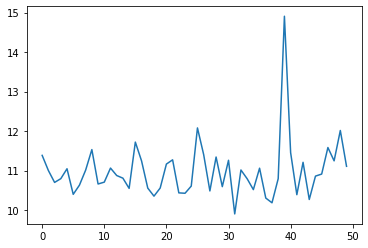

In [127]:
plt.plot(results_scale_100)


In [128]:
print("Step C: mean is {} and s.d is {}".format(np.mean(results_scale_100),np.std(results_scale_100)))
# higher mean but lower SD


Step C: mean is 10.983125824912852 and s.d is 0.7259392629510174


Having 100 epochs improves MAE


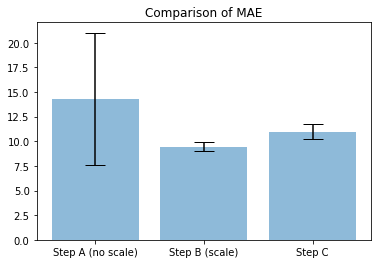

In [139]:
x_pos=np.arange(3)
CTEs = [np.mean(results),np.mean(results_scale),np.mean(results_scale_100)]
error = [np.std(results),np.std(results_scale),np.std(results_scale_100)]
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
plt.title("Comparison of MAE")
ax.set_xticks(x_pos)
labels = ["Step A (no scale)","Step B (scale)","Step C"]
ax.set_xticklabels(labels)
print("Having 100 epochs improves MAE")

# Step D

We first change the keras model to have 3 hidden layers with 10 neurons and relu activation

In [132]:
def keras_model():
    model = Sequential()
    model.add(Dense(10,input_shape = (predictors.shape[1],),activation = "relu"))
    model.add(Dense(10,activation="relu")) 
    model.add(Dense(10,activation="relu")) 
    model.add(Dense(1)) #no activation function here as you need the raw form, not transformed form
    model.compile(optimizer = "adam",loss="mean_squared_error",metrics = ["mae"])
    return model

In [133]:
results_scale = []
history_store_scale = []
for i in range(0,50):
    X_train, X_test,y_train,y_test = train_test_split(predictors,target, test_size = 0.3,random_state = 42)
    sc = StandardScaler()
    X_train_scale = sc.fit_transform(X_train)
    X_test_scale = sc.transform(X_test)
    model_scale = keras_model()
    history = model_scale.fit(X_train_scale,y_train,epochs = 50,validation_split=0.2)
    history_store_scale.append((i,history))
    results_scale.append(model_scale.evaluate(X_test_scale,y_test)[1])

Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 8s 14ms/step - loss: 1596.3469 - mean_absolute_error: 36.0827 - val_loss: 1607.6100 - val_mean_absolute_error: 36.8514
Epoch 2/50
576/576 [==============================] - 0s 194us/step - loss: 1570.2250 - mean_absolute_error: 35.7767 - val_loss: 1585.2265 - val_mean_absolute_error: 36.5779
Epoch 3/50
576/576 [==============================] - 0s 206us/step - loss: 1545.0000 - mean_absolute_error: 35.4718 - val_loss: 1561.1215 - val_mean_absolute_error: 36.2732
Epoch 4/50
576/576 [==============================] - 0s 203us/step - loss: 1516.8717 - mean_absolute_error: 35.1202 - val_loss: 1530.7994 - val_mean_absolute_error: 35.8804
Epoch 5/50
576/576 [==============================] - 0s 216us/step - loss: 1480.4417 - mean_absolute_error: 34.6439 - val_loss: 1489.3975 - val_mean_absolute_error: 35.3351
Epoch 6/50
576/576 [==============================] - 0s 211us/step - loss: 1427.8547

Epoch 45/50
576/576 [==============================] - 0s 216us/step - loss: 142.5698 - mean_absolute_error: 9.6737 - val_loss: 132.0545 - val_mean_absolute_error: 9.6303
Epoch 46/50
576/576 [==============================] - 0s 208us/step - loss: 141.5421 - mean_absolute_error: 9.6225 - val_loss: 131.6120 - val_mean_absolute_error: 9.6108
Epoch 47/50
576/576 [==============================] - 0s 219us/step - loss: 140.3965 - mean_absolute_error: 9.5940 - val_loss: 131.3240 - val_mean_absolute_error: 9.5954
Epoch 48/50
576/576 [==============================] - 0s 295us/step - loss: 139.8583 - mean_absolute_error: 9.5821 - val_loss: 130.0246 - val_mean_absolute_error: 9.5562
Epoch 49/50
576/576 [==============================] - 0s 234us/step - loss: 138.6079 - mean_absolute_error: 9.5324 - val_loss: 130.0977 - val_mean_absolute_error: 9.5483
Epoch 50/50
309/309 [==============================] - 0s 197us/step
Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==========

Epoch 42/50
576/576 [==============================] - 0s 199us/step - loss: 138.1312 - mean_absolute_error: 9.5247 - val_loss: 136.8017 - val_mean_absolute_error: 9.8607
Epoch 43/50
576/576 [==============================] - 0s 208us/step - loss: 136.2213 - mean_absolute_error: 9.4405 - val_loss: 134.6802 - val_mean_absolute_error: 9.7747
Epoch 44/50
576/576 [==============================] - 0s 206us/step - loss: 134.1040 - mean_absolute_error: 9.3726 - val_loss: 134.7151 - val_mean_absolute_error: 9.7870
Epoch 45/50
576/576 [==============================] - 0s 241us/step - loss: 132.0335 - mean_absolute_error: 9.3063 - val_loss: 133.5306 - val_mean_absolute_error: 9.7353
Epoch 46/50
576/576 [==============================] - 0s 253us/step - loss: 130.4629 - mean_absolute_error: 9.2394 - val_loss: 130.2574 - val_mean_absolute_error: 9.6040
Epoch 47/50
576/576 [==============================] - 0s 198us/step - loss: 128.1955 - mean_absolute_error: 9.1552 - val_loss: 129.1557 - val_me

Epoch 39/50
576/576 [==============================] - 0s 208us/step - loss: 158.0680 - mean_absolute_error: 10.2955 - val_loss: 150.5583 - val_mean_absolute_error: 10.2158
Epoch 40/50
576/576 [==============================] - 0s 250us/step - loss: 156.7749 - mean_absolute_error: 10.2670 - val_loss: 149.5362 - val_mean_absolute_error: 10.1813
Epoch 41/50
576/576 [==============================] - 0s 301us/step - loss: 155.5159 - mean_absolute_error: 10.1926 - val_loss: 147.3628 - val_mean_absolute_error: 10.1069
Epoch 42/50
576/576 [==============================] - 0s 263us/step - loss: 153.9705 - mean_absolute_error: 10.1627 - val_loss: 149.5830 - val_mean_absolute_error: 10.1762
Epoch 43/50
576/576 [==============================] - 0s 201us/step - loss: 152.3476 - mean_absolute_error: 10.1235 - val_loss: 146.7195 - val_mean_absolute_error: 10.0875
Epoch 44/50
576/576 [==============================] - 0s 208us/step - loss: 151.0686 - mean_absolute_error: 10.0576 - val_loss: 145.37

Epoch 36/50
576/576 [==============================] - 0s 203us/step - loss: 169.9888 - mean_absolute_error: 10.6046 - val_loss: 162.0131 - val_mean_absolute_error: 10.6044
Epoch 37/50
576/576 [==============================] - 0s 220us/step - loss: 167.4420 - mean_absolute_error: 10.5130 - val_loss: 158.7847 - val_mean_absolute_error: 10.5051
Epoch 38/50
576/576 [==============================] - 0s 215us/step - loss: 165.0062 - mean_absolute_error: 10.4379 - val_loss: 157.9485 - val_mean_absolute_error: 10.4921
Epoch 39/50
576/576 [==============================] - 0s 196us/step - loss: 163.0091 - mean_absolute_error: 10.3748 - val_loss: 154.9212 - val_mean_absolute_error: 10.3994
Epoch 40/50
576/576 [==============================] - 0s 229us/step - loss: 160.7944 - mean_absolute_error: 10.2959 - val_loss: 153.5057 - val_mean_absolute_error: 10.3553
Epoch 41/50
576/576 [==============================] - 0s 263us/step - loss: 158.7596 - mean_absolute_error: 10.2493 - val_loss: 152.26

Epoch 33/50
576/576 [==============================] - 0s 211us/step - loss: 168.1813 - mean_absolute_error: 10.4873 - val_loss: 157.7837 - val_mean_absolute_error: 10.6224
Epoch 34/50
576/576 [==============================] - 0s 208us/step - loss: 164.8392 - mean_absolute_error: 10.3870 - val_loss: 155.9108 - val_mean_absolute_error: 10.5463
Epoch 35/50
576/576 [==============================] - 0s 210us/step - loss: 162.4110 - mean_absolute_error: 10.3073 - val_loss: 154.6117 - val_mean_absolute_error: 10.4919
Epoch 36/50
576/576 [==============================] - 0s 209us/step - loss: 160.1663 - mean_absolute_error: 10.2437 - val_loss: 153.3397 - val_mean_absolute_error: 10.4379
Epoch 37/50
576/576 [==============================] - 0s 248us/step - loss: 157.5662 - mean_absolute_error: 10.1537 - val_loss: 149.9420 - val_mean_absolute_error: 10.3216
Epoch 38/50
576/576 [==============================] - 0s 264us/step - loss: 154.9770 - mean_absolute_error: 10.0768 - val_loss: 148.81

Epoch 30/50
576/576 [==============================] - 0s 274us/step - loss: 160.6355 - mean_absolute_error: 10.4933 - val_loss: 159.4502 - val_mean_absolute_error: 10.8187
Epoch 31/50
576/576 [==============================] - 0s 213us/step - loss: 157.8920 - mean_absolute_error: 10.4095 - val_loss: 156.5329 - val_mean_absolute_error: 10.7305
Epoch 32/50
576/576 [==============================] - 0s 206us/step - loss: 155.4357 - mean_absolute_error: 10.3077 - val_loss: 153.9880 - val_mean_absolute_error: 10.6523
Epoch 33/50
576/576 [==============================] - 0s 220us/step - loss: 153.0998 - mean_absolute_error: 10.2163 - val_loss: 151.8156 - val_mean_absolute_error: 10.5719
Epoch 34/50
576/576 [==============================] - 0s 208us/step - loss: 151.0555 - mean_absolute_error: 10.1411 - val_loss: 150.6942 - val_mean_absolute_error: 10.5229
Epoch 35/50
576/576 [==============================] - 0s 194us/step - loss: 149.5130 - mean_absolute_error: 10.0765 - val_loss: 148.67

Epoch 27/50
576/576 [==============================] - 0s 298us/step - loss: 172.2225 - mean_absolute_error: 10.6995 - val_loss: 157.8166 - val_mean_absolute_error: 10.4287
Epoch 28/50
576/576 [==============================] - 0s 210us/step - loss: 169.4039 - mean_absolute_error: 10.6187 - val_loss: 157.6652 - val_mean_absolute_error: 10.4220
Epoch 29/50
576/576 [==============================] - 0s 225us/step - loss: 167.2214 - mean_absolute_error: 10.5647 - val_loss: 155.9650 - val_mean_absolute_error: 10.3550
Epoch 30/50
576/576 [==============================] - 0s 216us/step - loss: 165.1590 - mean_absolute_error: 10.4897 - val_loss: 152.8192 - val_mean_absolute_error: 10.2599
Epoch 31/50
576/576 [==============================] - 0s 218us/step - loss: 163.2047 - mean_absolute_error: 10.4268 - val_loss: 151.4713 - val_mean_absolute_error: 10.2200
Epoch 32/50
576/576 [==============================] - 0s 210us/step - loss: 161.4501 - mean_absolute_error: 10.3798 - val_loss: 151.21

Epoch 24/50
576/576 [==============================] - 0s 227us/step - loss: 204.5627 - mean_absolute_error: 11.5507 - val_loss: 174.5454 - val_mean_absolute_error: 11.0796
Epoch 25/50
576/576 [==============================] - 0s 230us/step - loss: 200.5504 - mean_absolute_error: 11.4381 - val_loss: 171.3384 - val_mean_absolute_error: 10.9754
Epoch 26/50
576/576 [==============================] - 0s 293us/step - loss: 196.3618 - mean_absolute_error: 11.3118 - val_loss: 168.5988 - val_mean_absolute_error: 10.8865
Epoch 27/50
576/576 [==============================] - 0s 300us/step - loss: 192.9503 - mean_absolute_error: 11.2014 - val_loss: 164.9041 - val_mean_absolute_error: 10.7873
Epoch 28/50
576/576 [==============================] - 0s 204us/step - loss: 189.8096 - mean_absolute_error: 11.1134 - val_loss: 162.6248 - val_mean_absolute_error: 10.7145
Epoch 29/50
576/576 [==============================] - 0s 218us/step - loss: 186.7217 - mean_absolute_error: 11.0237 - val_loss: 162.20

Epoch 17/50
576/576 [==============================] - 0s 272us/step - loss: 235.1567 - mean_absolute_error: 12.5200 - val_loss: 205.0228 - val_mean_absolute_error: 11.4680
Epoch 18/50
576/576 [==============================] - 0s 263us/step - loss: 222.2671 - mean_absolute_error: 12.1397 - val_loss: 193.0845 - val_mean_absolute_error: 11.1661
Epoch 19/50
576/576 [==============================] - 0s 222us/step - loss: 212.8719 - mean_absolute_error: 11.8346 - val_loss: 186.9741 - val_mean_absolute_error: 11.0426
Epoch 20/50
576/576 [==============================] - 0s 208us/step - loss: 205.5998 - mean_absolute_error: 11.6062 - val_loss: 183.0780 - val_mean_absolute_error: 10.9940
Epoch 21/50
576/576 [==============================] - 0s 215us/step - loss: 199.9220 - mean_absolute_error: 11.4197 - val_loss: 179.6712 - val_mean_absolute_error: 10.9156
Epoch 22/50
576/576 [==============================] - 0s 284us/step - loss: 195.6755 - mean_absolute_error: 11.2747 - val_loss: 176.49

Epoch 14/50
576/576 [==============================] - 0s 215us/step - loss: 340.0223 - mean_absolute_error: 14.6495 - val_loss: 314.7291 - val_mean_absolute_error: 14.3737
Epoch 15/50
576/576 [==============================] - 0s 277us/step - loss: 293.9373 - mean_absolute_error: 13.6508 - val_loss: 273.7619 - val_mean_absolute_error: 13.3759
Epoch 16/50
576/576 [==============================] - 0s 274us/step - loss: 270.9636 - mean_absolute_error: 13.0794 - val_loss: 247.4525 - val_mean_absolute_error: 12.6262
Epoch 17/50
576/576 [==============================] - 0s 230us/step - loss: 253.7919 - mean_absolute_error: 12.7272 - val_loss: 233.9678 - val_mean_absolute_error: 12.3366
Epoch 18/50
576/576 [==============================] - 0s 216us/step - loss: 241.9616 - mean_absolute_error: 12.4511 - val_loss: 223.2387 - val_mean_absolute_error: 12.1219
Epoch 19/50
576/576 [==============================] - 0s 218us/step - loss: 233.1838 - mean_absolute_error: 12.2340 - val_loss: 216.23

Epoch 11/50
576/576 [==============================] - 0s 338us/step - loss: 542.0513 - mean_absolute_error: 18.8341 - val_loss: 485.5632 - val_mean_absolute_error: 18.0600
Epoch 12/50
576/576 [==============================] - 0s 249us/step - loss: 403.4497 - mean_absolute_error: 15.9157 - val_loss: 352.5756 - val_mean_absolute_error: 15.3515
Epoch 13/50
576/576 [==============================] - 0s 235us/step - loss: 314.4756 - mean_absolute_error: 14.0489 - val_loss: 273.4523 - val_mean_absolute_error: 13.6686
Epoch 14/50
576/576 [==============================] - 0s 230us/step - loss: 268.1103 - mean_absolute_error: 13.0137 - val_loss: 232.5549 - val_mean_absolute_error: 12.7538
Epoch 15/50
576/576 [==============================] - 0s 220us/step - loss: 244.6779 - mean_absolute_error: 12.4766 - val_loss: 211.8051 - val_mean_absolute_error: 12.2734
Epoch 16/50
576/576 [==============================] - 0s 320us/step - loss: 230.8677 - mean_absolute_error: 12.1238 - val_loss: 200.78

Epoch 8/50
576/576 [==============================] - 0s 303us/step - loss: 900.9866 - mean_absolute_error: 25.5062 - val_loss: 845.2081 - val_mean_absolute_error: 24.8511
Epoch 9/50
576/576 [==============================] - 0s 259us/step - loss: 713.1904 - mean_absolute_error: 22.1671 - val_loss: 646.6574 - val_mean_absolute_error: 20.9201
Epoch 10/50
576/576 [==============================] - 0s 271us/step - loss: 538.2665 - mean_absolute_error: 18.6076 - val_loss: 475.6177 - val_mean_absolute_error: 17.2415
Epoch 11/50
576/576 [==============================] - 0s 285us/step - loss: 412.1288 - mean_absolute_error: 15.6074 - val_loss: 357.5883 - val_mean_absolute_error: 14.8734
Epoch 12/50
576/576 [==============================] - 0s 313us/step - loss: 333.1657 - mean_absolute_error: 13.8005 - val_loss: 288.9281 - val_mean_absolute_error: 13.4225
Epoch 13/50
576/576 [==============================] - 0s 274us/step - loss: 289.7318 - mean_absolute_error: 12.9034 - val_loss: 248.9803

Epoch 5/50
576/576 [==============================] - 0s 261us/step - loss: 1414.4668 - mean_absolute_error: 33.6836 - val_loss: 1411.6708 - val_mean_absolute_error: 34.3054
Epoch 6/50
576/576 [==============================] - 0s 228us/step - loss: 1325.7421 - mean_absolute_error: 32.4173 - val_loss: 1315.6196 - val_mean_absolute_error: 32.9493
Epoch 7/50
576/576 [==============================] - 0s 235us/step - loss: 1210.1475 - mean_absolute_error: 30.6825 - val_loss: 1191.3571 - val_mean_absolute_error: 31.0956
Epoch 8/50
576/576 [==============================] - 0s 272us/step - loss: 1070.2154 - mean_absolute_error: 28.4011 - val_loss: 1038.5090 - val_mean_absolute_error: 28.6761
Epoch 9/50
576/576 [==============================] - 0s 268us/step - loss: 906.4710 - mean_absolute_error: 25.6946 - val_loss: 869.5526 - val_mean_absolute_error: 25.7035
Epoch 10/50
576/576 [==============================] - 0s 274us/step - loss: 737.3852 - mean_absolute_error: 22.6789 - val_loss: 691

Epoch 2/50
576/576 [==============================] - 0s 285us/step - loss: 1587.7802 - mean_absolute_error: 36.0313 - val_loss: 1610.0058 - val_mean_absolute_error: 36.9068
Epoch 3/50
576/576 [==============================] - 0s 256us/step - loss: 1581.2746 - mean_absolute_error: 35.9390 - val_loss: 1604.5163 - val_mean_absolute_error: 36.8294
Epoch 4/50
576/576 [==============================] - 0s 262us/step - loss: 1576.2448 - mean_absolute_error: 35.8644 - val_loss: 1599.6354 - val_mean_absolute_error: 36.7612
Epoch 5/50
576/576 [==============================] - 0s 301us/step - loss: 1571.1873 - mean_absolute_error: 35.7907 - val_loss: 1594.0860 - val_mean_absolute_error: 36.6843
Epoch 6/50
576/576 [==============================] - 0s 301us/step - loss: 1565.0338 - mean_absolute_error: 35.7005 - val_loss: 1586.8586 - val_mean_absolute_error: 36.5841
Epoch 7/50
576/576 [==============================] - 0s 285us/step - loss: 1556.5748 - mean_absolute_error: 35.5791 - val_loss: 1

Epoch 46/50
576/576 [==============================] - 0s 271us/step - loss: 125.3636 - mean_absolute_error: 9.0996 - val_loss: 132.9220 - val_mean_absolute_error: 9.5859
Epoch 47/50
576/576 [==============================] - 0s 236us/step - loss: 123.7052 - mean_absolute_error: 9.0279 - val_loss: 131.0755 - val_mean_absolute_error: 9.5199
Epoch 48/50
576/576 [==============================] - 0s 271us/step - loss: 121.6547 - mean_absolute_error: 8.9607 - val_loss: 131.3337 - val_mean_absolute_error: 9.5279
Epoch 49/50
576/576 [==============================] - 0s 216us/step - loss: 119.9652 - mean_absolute_error: 8.8836 - val_loss: 128.5471 - val_mean_absolute_error: 9.4070
Epoch 50/50
309/309 [==============================] - 0s 187us/step
Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 9s 16ms/step - loss: 1590.8066 - mean_absolute_error: 36.0549 - val_loss: 1609.5399 - val_mean_absolute_error: 36.8941
Epoch 2/50
576/576 [========

Epoch 43/50
576/576 [==============================] - 0s 287us/step - loss: 139.1229 - mean_absolute_error: 9.6259 - val_loss: 127.6154 - val_mean_absolute_error: 9.4459
Epoch 44/50
576/576 [==============================] - 0s 258us/step - loss: 138.3321 - mean_absolute_error: 9.5963 - val_loss: 127.8632 - val_mean_absolute_error: 9.4597
Epoch 45/50
576/576 [==============================] - 0s 256us/step - loss: 137.1335 - mean_absolute_error: 9.5498 - val_loss: 125.9742 - val_mean_absolute_error: 9.3961
Epoch 46/50
576/576 [==============================] - 0s 273us/step - loss: 136.1269 - mean_absolute_error: 9.5192 - val_loss: 126.1883 - val_mean_absolute_error: 9.4001
Epoch 47/50
576/576 [==============================] - 0s 226us/step - loss: 135.3799 - mean_absolute_error: 9.4976 - val_loss: 124.1960 - val_mean_absolute_error: 9.3219
Epoch 48/50
576/576 [==============================] - 0s 306us/step - loss: 134.3638 - mean_absolute_error: 9.4421 - val_loss: 125.8034 - val_me

Epoch 40/50
576/576 [==============================] - 0s 255us/step - loss: 115.5185 - mean_absolute_error: 8.6394 - val_loss: 118.6044 - val_mean_absolute_error: 8.9972
Epoch 41/50
576/576 [==============================] - 0s 259us/step - loss: 113.7390 - mean_absolute_error: 8.5622 - val_loss: 117.3379 - val_mean_absolute_error: 8.9042
Epoch 42/50
576/576 [==============================] - 0s 251us/step - loss: 112.1347 - mean_absolute_error: 8.4973 - val_loss: 117.1162 - val_mean_absolute_error: 8.9043
Epoch 43/50
576/576 [==============================] - 0s 261us/step - loss: 110.8012 - mean_absolute_error: 8.4346 - val_loss: 115.2498 - val_mean_absolute_error: 8.8235
Epoch 44/50
576/576 [==============================] - 0s 294us/step - loss: 109.3260 - mean_absolute_error: 8.3811 - val_loss: 115.4848 - val_mean_absolute_error: 8.8404
Epoch 45/50
576/576 [==============================] - 0s 286us/step - loss: 108.1371 - mean_absolute_error: 8.3168 - val_loss: 113.9445 - val_me

Epoch 37/50
576/576 [==============================] - 0s 281us/step - loss: 156.9243 - mean_absolute_error: 10.2498 - val_loss: 151.7425 - val_mean_absolute_error: 10.5833
Epoch 38/50
576/576 [==============================] - 0s 238us/step - loss: 155.3708 - mean_absolute_error: 10.1849 - val_loss: 148.9350 - val_mean_absolute_error: 10.4871
Epoch 39/50
576/576 [==============================] - 0s 279us/step - loss: 153.6627 - mean_absolute_error: 10.1274 - val_loss: 148.9148 - val_mean_absolute_error: 10.4870
Epoch 40/50
576/576 [==============================] - 0s 248us/step - loss: 151.8857 - mean_absolute_error: 10.0824 - val_loss: 148.2110 - val_mean_absolute_error: 10.4483
Epoch 41/50
576/576 [==============================] - 0s 277us/step - loss: 150.2681 - mean_absolute_error: 10.0315 - val_loss: 146.5180 - val_mean_absolute_error: 10.3832
Epoch 42/50
576/576 [==============================] - 0s 296us/step - loss: 148.9049 - mean_absolute_error: 9.9786 - val_loss: 145.406

Epoch 34/50
576/576 [==============================] - 0s 280us/step - loss: 156.8196 - mean_absolute_error: 10.1202 - val_loss: 149.8511 - val_mean_absolute_error: 10.1057
Epoch 35/50
576/576 [==============================] - 0s 268us/step - loss: 155.4660 - mean_absolute_error: 10.0790 - val_loss: 148.7059 - val_mean_absolute_error: 10.0590
Epoch 36/50
576/576 [==============================] - 0s 267us/step - loss: 154.3837 - mean_absolute_error: 10.0376 - val_loss: 146.6129 - val_mean_absolute_error: 9.9883
Epoch 37/50
576/576 [==============================] - 0s 318us/step - loss: 152.6204 - mean_absolute_error: 9.9909 - val_loss: 146.7321 - val_mean_absolute_error: 9.9940
Epoch 38/50
576/576 [==============================] - 0s 292us/step - loss: 151.4761 - mean_absolute_error: 9.9624 - val_loss: 145.8151 - val_mean_absolute_error: 9.9617
Epoch 39/50
576/576 [==============================] - 0s 239us/step - loss: 150.1848 - mean_absolute_error: 9.9262 - val_loss: 144.7797 - v

Epoch 31/50
576/576 [==============================] - 0s 272us/step - loss: 153.8749 - mean_absolute_error: 10.0691 - val_loss: 143.3189 - val_mean_absolute_error: 9.9953
Epoch 32/50
576/576 [==============================] - 0s 255us/step - loss: 152.1358 - mean_absolute_error: 10.0105 - val_loss: 142.1047 - val_mean_absolute_error: 9.9626
Epoch 33/50
576/576 [==============================] - 0s 294us/step - loss: 150.4908 - mean_absolute_error: 9.9638 - val_loss: 141.8827 - val_mean_absolute_error: 9.9535
Epoch 34/50
576/576 [==============================] - 0s 237us/step - loss: 149.4317 - mean_absolute_error: 9.9421 - val_loss: 142.1841 - val_mean_absolute_error: 9.9650
Epoch 35/50
576/576 [==============================] - 0s 277us/step - loss: 147.8208 - mean_absolute_error: 9.8906 - val_loss: 140.6611 - val_mean_absolute_error: 9.9023
Epoch 36/50
576/576 [==============================] - 0s 286us/step - loss: 146.7612 - mean_absolute_error: 9.8157 - val_loss: 137.7166 - val_

Epoch 28/50
576/576 [==============================] - 0s 302us/step - loss: 168.6152 - mean_absolute_error: 10.5442 - val_loss: 162.9185 - val_mean_absolute_error: 10.5335
Epoch 29/50
576/576 [==============================] - 0s 270us/step - loss: 166.1537 - mean_absolute_error: 10.4625 - val_loss: 160.1304 - val_mean_absolute_error: 10.4352
Epoch 30/50
576/576 [==============================] - 0s 303us/step - loss: 163.8123 - mean_absolute_error: 10.3855 - val_loss: 158.1714 - val_mean_absolute_error: 10.3595
Epoch 31/50
576/576 [==============================] - 0s 275us/step - loss: 161.5031 - mean_absolute_error: 10.2997 - val_loss: 156.5141 - val_mean_absolute_error: 10.3101
Epoch 32/50
576/576 [==============================] - 0s 274us/step - loss: 159.1060 - mean_absolute_error: 10.2266 - val_loss: 154.0662 - val_mean_absolute_error: 10.2099
Epoch 33/50
576/576 [==============================] - 0s 230us/step - loss: 156.8176 - mean_absolute_error: 10.1331 - val_loss: 150.97

Epoch 25/50
576/576 [==============================] - 0s 270us/step - loss: 178.3615 - mean_absolute_error: 10.7586 - val_loss: 163.0923 - val_mean_absolute_error: 10.5216
Epoch 26/50
576/576 [==============================] - 0s 291us/step - loss: 174.7353 - mean_absolute_error: 10.6637 - val_loss: 160.8651 - val_mean_absolute_error: 10.4742
Epoch 27/50
576/576 [==============================] - 0s 265us/step - loss: 170.3924 - mean_absolute_error: 10.5495 - val_loss: 156.3064 - val_mean_absolute_error: 10.3186
Epoch 28/50
576/576 [==============================] - 0s 291us/step - loss: 167.0875 - mean_absolute_error: 10.4607 - val_loss: 154.0309 - val_mean_absolute_error: 10.2628
Epoch 29/50
576/576 [==============================] - 0s 284us/step - loss: 164.0118 - mean_absolute_error: 10.3764 - val_loss: 153.0633 - val_mean_absolute_error: 10.2409
Epoch 30/50
576/576 [==============================] - 0s 328us/step - loss: 160.8070 - mean_absolute_error: 10.2834 - val_loss: 149.32

Epoch 22/50
576/576 [==============================] - 0s 296us/step - loss: 216.8533 - mean_absolute_error: 11.6991 - val_loss: 200.7781 - val_mean_absolute_error: 11.3461
Epoch 23/50
576/576 [==============================] - 0s 274us/step - loss: 209.9607 - mean_absolute_error: 11.5220 - val_loss: 193.5241 - val_mean_absolute_error: 11.2166
Epoch 24/50
576/576 [==============================] - 0s 268us/step - loss: 203.9351 - mean_absolute_error: 11.3911 - val_loss: 189.3050 - val_mean_absolute_error: 11.1567
Epoch 25/50
576/576 [==============================] - 0s 268us/step - loss: 199.2484 - mean_absolute_error: 11.2918 - val_loss: 185.4403 - val_mean_absolute_error: 11.0834
Epoch 26/50
576/576 [==============================] - 0s 268us/step - loss: 194.3726 - mean_absolute_error: 11.1633 - val_loss: 180.0479 - val_mean_absolute_error: 10.9708
Epoch 27/50
576/576 [==============================] - 0s 285us/step - loss: 190.5508 - mean_absolute_error: 11.0676 - val_loss: 175.14

Epoch 19/50
576/576 [==============================] - 0s 339us/step - loss: 183.0597 - mean_absolute_error: 10.9715 - val_loss: 162.4233 - val_mean_absolute_error: 10.4595
Epoch 20/50
576/576 [==============================] - 0s 324us/step - loss: 177.7611 - mean_absolute_error: 10.8234 - val_loss: 158.2048 - val_mean_absolute_error: 10.3394
Epoch 21/50
576/576 [==============================] - 0s 284us/step - loss: 172.7790 - mean_absolute_error: 10.6751 - val_loss: 152.7992 - val_mean_absolute_error: 10.1774
Epoch 22/50
576/576 [==============================] - 0s 305us/step - loss: 168.9015 - mean_absolute_error: 10.5635 - val_loss: 149.0213 - val_mean_absolute_error: 10.0683
Epoch 23/50
576/576 [==============================] - 0s 279us/step - loss: 164.8957 - mean_absolute_error: 10.4613 - val_loss: 148.0838 - val_mean_absolute_error: 10.0763
Epoch 24/50
576/576 [==============================] - 0s 276us/step - loss: 161.7650 - mean_absolute_error: 10.3793 - val_loss: 145.44

Epoch 16/50
576/576 [==============================] - 0s 268us/step - loss: 267.5240 - mean_absolute_error: 13.4299 - val_loss: 258.3394 - val_mean_absolute_error: 13.3272
Epoch 17/50
576/576 [==============================] - 0s 268us/step - loss: 254.4385 - mean_absolute_error: 13.0484 - val_loss: 247.1484 - val_mean_absolute_error: 13.0428
Epoch 18/50
576/576 [==============================] - 0s 301us/step - loss: 243.8726 - mean_absolute_error: 12.7501 - val_loss: 235.9571 - val_mean_absolute_error: 12.7675
Epoch 19/50
576/576 [==============================] - 0s 274us/step - loss: 234.4533 - mean_absolute_error: 12.4980 - val_loss: 229.1716 - val_mean_absolute_error: 12.5610
Epoch 20/50
576/576 [==============================] - 0s 255us/step - loss: 226.6144 - mean_absolute_error: 12.2690 - val_loss: 220.2177 - val_mean_absolute_error: 12.3289
Epoch 21/50
576/576 [==============================] - 0s 270us/step - loss: 220.0987 - mean_absolute_error: 12.0999 - val_loss: 213.97

Epoch 9/50
576/576 [==============================] - 0s 225us/step - loss: 891.7921 - mean_absolute_error: 25.4309 - val_loss: 828.3608 - val_mean_absolute_error: 24.7979
Epoch 10/50
576/576 [==============================] - 0s 276us/step - loss: 691.1373 - mean_absolute_error: 21.7510 - val_loss: 629.2905 - val_mean_absolute_error: 20.8733
Epoch 11/50
576/576 [==============================] - 0s 230us/step - loss: 501.4774 - mean_absolute_error: 18.1056 - val_loss: 452.4886 - val_mean_absolute_error: 17.1700
Epoch 12/50
576/576 [==============================] - 0s 326us/step - loss: 359.7688 - mean_absolute_error: 15.1458 - val_loss: 323.0158 - val_mean_absolute_error: 14.4835
Epoch 13/50
576/576 [==============================] - 0s 285us/step - loss: 273.9246 - mean_absolute_error: 13.3256 - val_loss: 255.0885 - val_mean_absolute_error: 12.9488
Epoch 14/50
576/576 [==============================] - 0s 300us/step - loss: 242.0063 - mean_absolute_error: 12.6727 - val_loss: 219.442

Epoch 6/50
576/576 [==============================] - 0s 277us/step - loss: 1365.6884 - mean_absolute_error: 32.8065 - val_loss: 1344.2136 - val_mean_absolute_error: 33.0551
Epoch 7/50
576/576 [==============================] - 0s 283us/step - loss: 1286.6350 - mean_absolute_error: 31.5674 - val_loss: 1251.9097 - val_mean_absolute_error: 31.5961
Epoch 8/50
576/576 [==============================] - 0s 277us/step - loss: 1186.3887 - mean_absolute_error: 29.9634 - val_loss: 1138.3707 - val_mean_absolute_error: 29.7293
Epoch 9/50
576/576 [==============================] - 0s 306us/step - loss: 1066.1710 - mean_absolute_error: 27.9328 - val_loss: 1003.5808 - val_mean_absolute_error: 27.3870
Epoch 10/50
576/576 [==============================] - 0s 291us/step - loss: 925.3989 - mean_absolute_error: 25.4784 - val_loss: 856.7192 - val_mean_absolute_error: 24.7174
Epoch 11/50
576/576 [==============================] - 0s 272us/step - loss: 776.2083 - mean_absolute_error: 22.7787 - val_loss: 70

Epoch 3/50
576/576 [==============================] - 0s 276us/step - loss: 1523.7081 - mean_absolute_error: 35.1835 - val_loss: 1538.9830 - val_mean_absolute_error: 35.9867
Epoch 4/50
576/576 [==============================] - 0s 305us/step - loss: 1491.7451 - mean_absolute_error: 34.7431 - val_loss: 1502.6573 - val_mean_absolute_error: 35.4989
Epoch 5/50
576/576 [==============================] - 0s 293us/step - loss: 1446.1625 - mean_absolute_error: 34.1044 - val_loss: 1448.8887 - val_mean_absolute_error: 34.7673
Epoch 6/50
576/576 [==============================] - 0s 262us/step - loss: 1378.8591 - mean_absolute_error: 33.1385 - val_loss: 1368.9184 - val_mean_absolute_error: 33.6492
Epoch 7/50
576/576 [==============================] - 0s 260us/step - loss: 1279.0696 - mean_absolute_error: 31.6753 - val_loss: 1251.3969 - val_mean_absolute_error: 31.9293
Epoch 8/50
576/576 [==============================] - 0s 329us/step - loss: 1135.0264 - mean_absolute_error: 29.4236 - val_loss: 1

Epoch 47/50
576/576 [==============================] - 0s 402us/step - loss: 138.9149 - mean_absolute_error: 9.4754 - val_loss: 125.1889 - val_mean_absolute_error: 9.1807
Epoch 48/50
576/576 [==============================] - 0s 340us/step - loss: 137.0041 - mean_absolute_error: 9.4066 - val_loss: 124.0693 - val_mean_absolute_error: 9.1482
Epoch 49/50
576/576 [==============================] - 0s 338us/step - loss: 134.9441 - mean_absolute_error: 9.3280 - val_loss: 121.8359 - val_mean_absolute_error: 9.0594
Epoch 50/50
309/309 [==============================] - 0s 378us/step
Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 13s 23ms/step - loss: 1562.4660 - mean_absolute_error: 35.6773 - val_loss: 1581.2238 - val_mean_absolute_error: 36.5264
Epoch 2/50
576/576 [==============================] - 0s 620us/step - loss: 1545.8978 - mean_absolute_error: 35.4454 - val_loss: 1560.7943 - val_mean_absolute_error: 36.2552
Epoch 3/50
576/576 [====

Epoch 44/50
576/576 [==============================] - 0s 277us/step - loss: 110.2878 - mean_absolute_error: 8.3691 - val_loss: 104.8053 - val_mean_absolute_error: 8.5005
Epoch 45/50
576/576 [==============================] - 0s 287us/step - loss: 108.3255 - mean_absolute_error: 8.2953 - val_loss: 102.5261 - val_mean_absolute_error: 8.3822
Epoch 46/50
576/576 [==============================] - 0s 286us/step - loss: 106.5074 - mean_absolute_error: 8.1985 - val_loss: 102.8726 - val_mean_absolute_error: 8.4061
Epoch 47/50
576/576 [==============================] - 0s 260us/step - loss: 104.4196 - mean_absolute_error: 8.1122 - val_loss: 100.7644 - val_mean_absolute_error: 8.2970
Epoch 48/50
576/576 [==============================] - 0s 310us/step - loss: 102.9426 - mean_absolute_error: 8.0336 - val_loss: 99.6415 - val_mean_absolute_error: 8.2291
Epoch 49/50
576/576 [==============================] - 0s 487us/step - loss: 101.3442 - mean_absolute_error: 7.9633 - val_loss: 100.7977 - val_mea

Epoch 41/50
576/576 [==============================] - 0s 338us/step - loss: 155.0016 - mean_absolute_error: 10.0246 - val_loss: 145.8149 - val_mean_absolute_error: 10.1847
Epoch 42/50
576/576 [==============================] - 0s 390us/step - loss: 153.7419 - mean_absolute_error: 9.9903 - val_loss: 145.0796 - val_mean_absolute_error: 10.1636
Epoch 43/50
576/576 [==============================] - 0s 403us/step - loss: 152.4212 - mean_absolute_error: 9.9480 - val_loss: 144.4087 - val_mean_absolute_error: 10.1373
Epoch 44/50
576/576 [==============================] - 0s 354us/step - loss: 151.2366 - mean_absolute_error: 9.9194 - val_loss: 143.3452 - val_mean_absolute_error: 10.0899
Epoch 45/50
576/576 [==============================] - 0s 372us/step - loss: 150.0769 - mean_absolute_error: 9.8816 - val_loss: 141.9908 - val_mean_absolute_error: 10.0325
Epoch 46/50
576/576 [==============================] - 0s 388us/step - loss: 149.1218 - mean_absolute_error: 9.8470 - val_loss: 141.1749 - 

Epoch 38/50
576/576 [==============================] - 0s 427us/step - loss: 168.3253 - mean_absolute_error: 10.4640 - val_loss: 158.6367 - val_mean_absolute_error: 10.6517
Epoch 39/50
576/576 [==============================] - 0s 389us/step - loss: 166.7358 - mean_absolute_error: 10.3932 - val_loss: 155.0807 - val_mean_absolute_error: 10.5386
Epoch 40/50
576/576 [==============================] - 0s 315us/step - loss: 164.3536 - mean_absolute_error: 10.3310 - val_loss: 155.1887 - val_mean_absolute_error: 10.5391
Epoch 41/50
576/576 [==============================] - 0s 301us/step - loss: 162.3535 - mean_absolute_error: 10.2871 - val_loss: 153.2919 - val_mean_absolute_error: 10.4648
Epoch 42/50
576/576 [==============================] - 0s 414us/step - loss: 160.7251 - mean_absolute_error: 10.2363 - val_loss: 150.9737 - val_mean_absolute_error: 10.3820
Epoch 43/50
576/576 [==============================] - 0s 445us/step - loss: 158.9915 - mean_absolute_error: 10.1871 - val_loss: 150.80

Epoch 35/50
576/576 [==============================] - 0s 312us/step - loss: 151.9593 - mean_absolute_error: 9.9015 - val_loss: 143.1515 - val_mean_absolute_error: 10.1792
Epoch 36/50
576/576 [==============================] - 0s 286us/step - loss: 150.1091 - mean_absolute_error: 9.8569 - val_loss: 142.1099 - val_mean_absolute_error: 10.1438
Epoch 37/50
576/576 [==============================] - 0s 281us/step - loss: 148.4241 - mean_absolute_error: 9.7899 - val_loss: 138.8098 - val_mean_absolute_error: 10.0409
Epoch 38/50
576/576 [==============================] - 0s 265us/step - loss: 146.7868 - mean_absolute_error: 9.7441 - val_loss: 140.0008 - val_mean_absolute_error: 10.0723
Epoch 39/50
576/576 [==============================] - 0s 282us/step - loss: 145.0686 - mean_absolute_error: 9.6904 - val_loss: 137.5373 - val_mean_absolute_error: 9.9953
Epoch 40/50
576/576 [==============================] - 0s 282us/step - loss: 143.3223 - mean_absolute_error: 9.6586 - val_loss: 137.5884 - va

Epoch 32/50
576/576 [==============================] - 0s 279us/step - loss: 154.9146 - mean_absolute_error: 9.9630 - val_loss: 150.2360 - val_mean_absolute_error: 9.9615
Epoch 33/50
576/576 [==============================] - 0s 275us/step - loss: 152.3956 - mean_absolute_error: 9.8751 - val_loss: 149.9033 - val_mean_absolute_error: 9.9759
Epoch 34/50
576/576 [==============================] - 0s 282us/step - loss: 150.1661 - mean_absolute_error: 9.8004 - val_loss: 148.2557 - val_mean_absolute_error: 9.9193
Epoch 35/50
576/576 [==============================] - 0s 350us/step - loss: 147.8177 - mean_absolute_error: 9.7233 - val_loss: 146.2443 - val_mean_absolute_error: 9.8593
Epoch 36/50
576/576 [==============================] - 0s 280us/step - loss: 145.8799 - mean_absolute_error: 9.6548 - val_loss: 143.9041 - val_mean_absolute_error: 9.7599
Epoch 37/50
576/576 [==============================] - 0s 313us/step - loss: 143.7852 - mean_absolute_error: 9.5939 - val_loss: 144.2960 - val_me

Epoch 29/50
576/576 [==============================] - 0s 320us/step - loss: 178.4808 - mean_absolute_error: 10.8922 - val_loss: 162.9936 - val_mean_absolute_error: 10.6898
Epoch 30/50
576/576 [==============================] - 0s 313us/step - loss: 175.6919 - mean_absolute_error: 10.8048 - val_loss: 161.6610 - val_mean_absolute_error: 10.6638
Epoch 31/50
576/576 [==============================] - 0s 293us/step - loss: 173.2003 - mean_absolute_error: 10.7210 - val_loss: 158.8874 - val_mean_absolute_error: 10.5741
Epoch 32/50
576/576 [==============================] - 0s 301us/step - loss: 170.7576 - mean_absolute_error: 10.6391 - val_loss: 157.5825 - val_mean_absolute_error: 10.5414
Epoch 33/50
576/576 [==============================] - 0s 274us/step - loss: 168.3498 - mean_absolute_error: 10.5660 - val_loss: 156.5225 - val_mean_absolute_error: 10.5177
Epoch 34/50
576/576 [==============================] - 0s 280us/step - loss: 166.4007 - mean_absolute_error: 10.5120 - val_loss: 155.49

Epoch 26/50
576/576 [==============================] - 0s 289us/step - loss: 182.0408 - mean_absolute_error: 10.9289 - val_loss: 160.7381 - val_mean_absolute_error: 10.5652
Epoch 27/50
576/576 [==============================] - 0s 334us/step - loss: 179.2419 - mean_absolute_error: 10.8339 - val_loss: 159.2908 - val_mean_absolute_error: 10.5289
Epoch 28/50
576/576 [==============================] - 0s 466us/step - loss: 176.4306 - mean_absolute_error: 10.7493 - val_loss: 157.5807 - val_mean_absolute_error: 10.4763
Epoch 29/50
576/576 [==============================] - 0s 421us/step - loss: 174.2364 - mean_absolute_error: 10.6853 - val_loss: 155.6406 - val_mean_absolute_error: 10.4181
Epoch 30/50
576/576 [==============================] - 0s 367us/step - loss: 171.4796 - mean_absolute_error: 10.6075 - val_loss: 152.1173 - val_mean_absolute_error: 10.3057
Epoch 31/50
576/576 [==============================] - 0s 355us/step - loss: 169.2625 - mean_absolute_error: 10.5295 - val_loss: 150.86

Epoch 23/50
576/576 [==============================] - 0s 346us/step - loss: 211.4634 - mean_absolute_error: 11.6717 - val_loss: 186.3952 - val_mean_absolute_error: 11.2935
Epoch 24/50
576/576 [==============================] - 0s 275us/step - loss: 203.7503 - mean_absolute_error: 11.4737 - val_loss: 181.6371 - val_mean_absolute_error: 11.1823
Epoch 25/50
576/576 [==============================] - 0s 355us/step - loss: 197.5568 - mean_absolute_error: 11.3097 - val_loss: 175.9955 - val_mean_absolute_error: 11.0408
Epoch 26/50
576/576 [==============================] - 0s 313us/step - loss: 192.3591 - mean_absolute_error: 11.1488 - val_loss: 171.6227 - val_mean_absolute_error: 10.9162
Epoch 27/50
576/576 [==============================] - 0s 373us/step - loss: 187.8391 - mean_absolute_error: 11.0297 - val_loss: 168.4828 - val_mean_absolute_error: 10.8481
Epoch 28/50
576/576 [==============================] - 0s 408us/step - loss: 183.3084 - mean_absolute_error: 10.9020 - val_loss: 164.78

Epoch 20/50
576/576 [==============================] - 0s 288us/step - loss: 202.3530 - mean_absolute_error: 11.5832 - val_loss: 167.6686 - val_mean_absolute_error: 10.7081
Epoch 21/50
576/576 [==============================] - 0s 334us/step - loss: 198.1471 - mean_absolute_error: 11.4625 - val_loss: 164.6623 - val_mean_absolute_error: 10.6428
Epoch 22/50
576/576 [==============================] - 0s 280us/step - loss: 194.4232 - mean_absolute_error: 11.3507 - val_loss: 163.9215 - val_mean_absolute_error: 10.6228
Epoch 23/50
576/576 [==============================] - 0s 305us/step - loss: 190.5945 - mean_absolute_error: 11.2340 - val_loss: 161.2484 - val_mean_absolute_error: 10.5503
Epoch 24/50
576/576 [==============================] - 0s 300us/step - loss: 187.6256 - mean_absolute_error: 11.1518 - val_loss: 160.6677 - val_mean_absolute_error: 10.5334
Epoch 25/50
576/576 [==============================] - 0s 290us/step - loss: 184.7924 - mean_absolute_error: 11.0476 - val_loss: 157.91

Epoch 13/50
576/576 [==============================] - 0s 304us/step - loss: 285.8940 - mean_absolute_error: 13.3796 - val_loss: 244.4164 - val_mean_absolute_error: 12.7343
Epoch 14/50
576/576 [==============================] - 0s 312us/step - loss: 240.5073 - mean_absolute_error: 12.4598 - val_loss: 208.9750 - val_mean_absolute_error: 11.9732
Epoch 15/50
576/576 [==============================] - 0s 294us/step - loss: 224.7244 - mean_absolute_error: 12.1148 - val_loss: 194.1666 - val_mean_absolute_error: 11.5933
Epoch 16/50
576/576 [==============================] - 0s 298us/step - loss: 217.0360 - mean_absolute_error: 11.8818 - val_loss: 185.6402 - val_mean_absolute_error: 11.3460
Epoch 17/50
576/576 [==============================] - 0s 275us/step - loss: 208.9808 - mean_absolute_error: 11.6912 - val_loss: 183.4803 - val_mean_absolute_error: 11.2865
Epoch 18/50
576/576 [==============================] - 0s 322us/step - loss: 202.8615 - mean_absolute_error: 11.5289 - val_loss: 178.95

Epoch 10/50
576/576 [==============================] - 0s 307us/step - loss: 733.4087 - mean_absolute_error: 22.2049 - val_loss: 654.5506 - val_mean_absolute_error: 20.9348
Epoch 11/50
576/576 [==============================] - 0s 307us/step - loss: 569.0260 - mean_absolute_error: 19.2060 - val_loss: 501.9772 - val_mean_absolute_error: 17.7606
Epoch 12/50
576/576 [==============================] - 0s 315us/step - loss: 439.3087 - mean_absolute_error: 16.6441 - val_loss: 391.1410 - val_mean_absolute_error: 15.5301
Epoch 13/50
576/576 [==============================] - 0s 308us/step - loss: 351.8148 - mean_absolute_error: 14.7258 - val_loss: 317.7856 - val_mean_absolute_error: 13.9533
Epoch 14/50
576/576 [==============================] - 0s 355us/step - loss: 300.7891 - mean_absolute_error: 13.6003 - val_loss: 269.6106 - val_mean_absolute_error: 12.9291
Epoch 15/50
576/576 [==============================] - 0s 459us/step - loss: 268.1794 - mean_absolute_error: 12.8801 - val_loss: 242.13

Epoch 3/50
576/576 [==============================] - 0s 345us/step - loss: 1502.7027 - mean_absolute_error: 34.7336 - val_loss: 1514.7152 - val_mean_absolute_error: 35.5617
Epoch 4/50
576/576 [==============================] - 0s 350us/step - loss: 1467.0802 - mean_absolute_error: 34.1973 - val_loss: 1472.4532 - val_mean_absolute_error: 34.9561
Epoch 5/50
576/576 [==============================] - 0s 331us/step - loss: 1416.1420 - mean_absolute_error: 33.4142 - val_loss: 1411.8887 - val_mean_absolute_error: 34.0694
Epoch 6/50
576/576 [==============================] - 0s 351us/step - loss: 1344.5194 - mean_absolute_error: 32.2912 - val_loss: 1326.2158 - val_mean_absolute_error: 32.7755
Epoch 7/50
576/576 [==============================] - 0s 372us/step - loss: 1245.5930 - mean_absolute_error: 30.6870 - val_loss: 1211.8176 - val_mean_absolute_error: 30.9608
Epoch 8/50
576/576 [==============================] - 0s 309us/step - loss: 1115.7801 - mean_absolute_error: 28.5307 - val_loss: 1

Epoch 47/50
576/576 [==============================] - 0s 330us/step - loss: 137.1276 - mean_absolute_error: 9.4816 - val_loss: 133.6774 - val_mean_absolute_error: 9.7069
Epoch 48/50
576/576 [==============================] - 0s 332us/step - loss: 136.1519 - mean_absolute_error: 9.4426 - val_loss: 132.8549 - val_mean_absolute_error: 9.6682
Epoch 49/50
576/576 [==============================] - 0s 357us/step - loss: 135.4419 - mean_absolute_error: 9.4232 - val_loss: 132.4694 - val_mean_absolute_error: 9.6496
Epoch 50/50
309/309 [==============================] - 0s 265us/step
Train on 576 samples, validate on 145 samples
Epoch 1/50
576/576 [==============================] - 12s 21ms/step - loss: 1568.3099 - mean_absolute_error: 35.6963 - val_loss: 1584.9159 - val_mean_absolute_error: 36.5058
Epoch 2/50
576/576 [==============================] - 0s 397us/step - loss: 1547.1057 - mean_absolute_error: 35.4075 - val_loss: 1564.5974 - val_mean_absolute_error: 36.2267
Epoch 3/50
576/576 [====

Epoch 44/50
576/576 [==============================] - 0s 369us/step - loss: 143.3512 - mean_absolute_error: 9.8099 - val_loss: 134.7201 - val_mean_absolute_error: 9.9131
Epoch 45/50
576/576 [==============================] - 0s 333us/step - loss: 142.5489 - mean_absolute_error: 9.7838 - val_loss: 133.7660 - val_mean_absolute_error: 9.8806
Epoch 46/50
576/576 [==============================] - 0s 375us/step - loss: 141.2834 - mean_absolute_error: 9.7293 - val_loss: 132.1646 - val_mean_absolute_error: 9.8185
Epoch 47/50
576/576 [==============================] - 0s 347us/step - loss: 140.5616 - mean_absolute_error: 9.7030 - val_loss: 132.7380 - val_mean_absolute_error: 9.8343
Epoch 48/50
576/576 [==============================] - 0s 368us/step - loss: 139.5976 - mean_absolute_error: 9.6804 - val_loss: 132.4418 - val_mean_absolute_error: 9.8252
Epoch 49/50
576/576 [==============================] - 0s 355us/step - loss: 138.8365 - mean_absolute_error: 9.6499 - val_loss: 131.5388 - val_me

Epoch 41/50
576/576 [==============================] - 0s 597us/step - loss: 146.0814 - mean_absolute_error: 9.9669 - val_loss: 139.2592 - val_mean_absolute_error: 10.0944
Epoch 42/50
576/576 [==============================] - 0s 554us/step - loss: 143.7212 - mean_absolute_error: 9.8830 - val_loss: 136.6400 - val_mean_absolute_error: 10.0165
Epoch 43/50
576/576 [==============================] - 0s 549us/step - loss: 141.7527 - mean_absolute_error: 9.8070 - val_loss: 135.6403 - val_mean_absolute_error: 9.9663
Epoch 44/50
576/576 [==============================] - 0s 576us/step - loss: 139.8939 - mean_absolute_error: 9.7390 - val_loss: 134.5832 - val_mean_absolute_error: 9.9312
Epoch 45/50
576/576 [==============================] - 0s 527us/step - loss: 138.4208 - mean_absolute_error: 9.6941 - val_loss: 134.3502 - val_mean_absolute_error: 9.9232
Epoch 46/50
576/576 [==============================] - 0s 718us/step - loss: 136.1829 - mean_absolute_error: 9.6195 - val_loss: 132.6114 - val_

Epoch 38/50
576/576 [==============================] - 0s 328us/step - loss: 133.5385 - mean_absolute_error: 9.2566 - val_loss: 123.7669 - val_mean_absolute_error: 9.2990
Epoch 39/50
576/576 [==============================] - 0s 335us/step - loss: 131.5317 - mean_absolute_error: 9.1937 - val_loss: 122.2407 - val_mean_absolute_error: 9.2356
Epoch 40/50
576/576 [==============================] - 0s 382us/step - loss: 128.9068 - mean_absolute_error: 9.0757 - val_loss: 119.9524 - val_mean_absolute_error: 9.1416
Epoch 41/50
576/576 [==============================] - 0s 336us/step - loss: 126.7355 - mean_absolute_error: 8.9926 - val_loss: 118.1579 - val_mean_absolute_error: 9.0625
Epoch 42/50
576/576 [==============================] - 0s 368us/step - loss: 124.5960 - mean_absolute_error: 8.9235 - val_loss: 116.4385 - val_mean_absolute_error: 8.9586
Epoch 43/50
576/576 [==============================] - 0s 440us/step - loss: 122.7201 - mean_absolute_error: 8.8294 - val_loss: 114.4616 - val_me

Text(0.5, 1.0, 'Step D MAE')

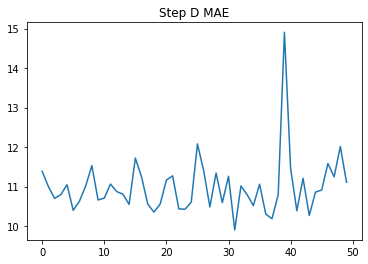

In [135]:
plt.plot(results_scale_100)
plt.title("Step D MAE")

In [136]:
print("Step D: mean is {} and s.d is {}".format(np.mean(results_scale),np.std(results_scale)))


Step d: mean is 9.445002901947616 and s.d is 0.4400277634505571


# Conclusion

Having more dense layers only slightly improves the MAE of having more epochs


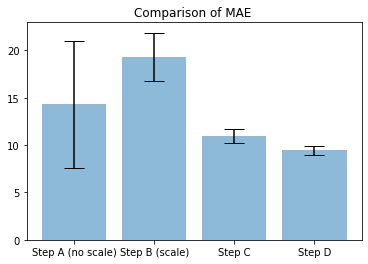

In [138]:
x_pos=np.arange(4)
CTEs = [np.mean(results), 19.293234823591117 ,np.mean(results_scale_100),9.445002901947616 ]
error = [np.std(results),2.569,np.std(results_scale_100),0.4400277634505571]
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
plt.title("Comparison of MAE ")
ax.set_xticks(x_pos)
labels = ["Step A (no scale)","Step B (scale)","Step C","Step D"]
ax.set_xticklabels(labels)
print("Having more dense layers only slightly improves the MAE of having more epochs")

<a id="item1"></a>

<a id='item32'></a>

<a id='item33'></a>

<a id="item4"></a>

<a id='item34'></a>